Memuat model dari: yawn_detector_notebook.pth


C:\Users\kenny\AppData\Local\Temp\ipykernel_17876\3250731066.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location=d


Hasil Prediksi: no_yawn
Tingkat Kepercayaan: 98.22%


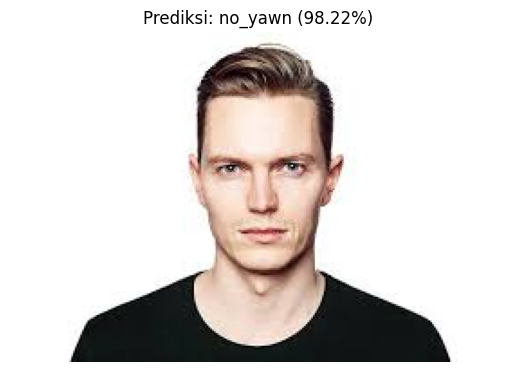

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

MODEL_PATH = "yawn_detector_notebook.pth" 
IMAGE_PATH = "test_pict/download.jpeg" 
CLASS_NAMES = ['no_yawn', 'yawn']

print(f"Memuat model dari: {MODEL_PATH}")
device = torch.device("cpu")

# Definisikan ulang arsitektur model
model = models.mobilenet_v2()
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, len(CLASS_NAMES))
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval() # Set model ke mode evaluasi

# Proses Gambar
inference_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Buka dan proses gambar
try:
    image = Image.open(IMAGE_PATH).convert('RGB')
    image_tensor = inference_transform(image).unsqueeze(0).to(device)

    # Lakukan Prediksi
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        _, preds = torch.max(outputs, 1)
        
        predicted_class = CLASS_NAMES[preds.item()]
        confidence = probabilities[preds.item()].item()

    #Tampilkan Hasil 
    print(f"\nHasil Prediksi: {predicted_class}")
    print(f"Tingkat Kepercayaan: {confidence:.2%}")
    
    # Tampilkan gambar dengan judul prediksinya
    plt.imshow(image)
    plt.title(f'Prediksi: {predicted_class} ({confidence:.2%})')
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"\nERROR: File tidak ditemukan di '{IMAGE_PATH}'.")
    print("Mohon periksa kembali path gambar Anda di bagian Konfigurasi.")

In [ ]:
# realtime_detector.py

import cv2
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image


MODEL_PATH = "yawn_detector_notebook.pth" 
CLASS_NAMES = ['no_yawn', 'yawn']

def main():    
    # 1. Muat Model
    print("Memuat model...")
    device = torch.device("cpu")
    
    # arsitektur model
    model = models.mobilenet_v2()
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, len(CLASS_NAMES))
    
    # Muat bobot yang sudah dilatih
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.to(device)
    model.eval() # Set ke mode evaluasi
    print("Model berhasil dimuat.")
    
    # Definisikan transformasi gambar
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Inisialisasi Webcam
    cap = cv2.VideoCapture(0) # 0 adalah ID untuk webcam default
    if not cap.isOpened():
        print("Error: Tidak bisa membuka webcam.")
        return
        
    print("\nWebcam aktif. Tekan 'q' untuk keluar.")
    
    # Loop Real-time
    while True:
        # Baca satu frame dari webcam
        ret, frame = cap.read()
        if not ret:
            print("Gagal membaca frame. Keluar...")
            break
            
        # Balik frame secara horizontal agar seperti cermin
        frame = cv2.flip(frame, 1)

        # Proses frame untuk prediksi
        # Konversi frame OpenCV (BGR) ke PIL Image (RGB)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(rgb_frame)
        
        # Terapkan transformasi dan buat batch
        input_tensor = transform(pil_image).unsqueeze(0).to(device)
        
        # Lakukan prediksi
        with torch.no_grad():
            outputs = model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
            _, preds = torch.max(outputs, 1)
            
            predicted_class = CLASS_NAMES[preds.item()]
            confidence = probabilities[preds.item()].item()
            
        # Tentukan warna teks berdasarkan prediksi
        if predicted_class == 'yawn':
            text_color = (0, 0, 255) # Merah
        else:
            text_color = (0, 255, 0) # Hijau
            
        # Tampilkan hasil prediksi pada frame
        text = f"Prediksi: {predicted_class} ({confidence:.2%})"
        cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, text_color, 2)
        
        # Tampilkan frame di jendela
        cv2.imshow('Real-time Yawn Detector', frame)
        
        # tombol 'q' untuk keluar
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    print("Menutup aplikasi.")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()

Memuat model...
Model berhasil dimuat.


C:\Users\kenny\AppData\Local\Temp\ipykernel_17876\907044124.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location=de


Webcam aktif. Tekan 'q' untuk keluar.
Menutup aplikasi.
